In [1]:
import pandas as pd
import numpy as np
import csv
import scipy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
caged = pd.read_csv(r'C:\Users\divin\OneDrive - Tupelo Consultoria\Documents\Tupelo\Treinamentos\Data Science\Desafio 1-20190915/CAGEDEST_122018.txt', encoding = 'latin-1',delimiter=';')

In [3]:
caged['Salário Mensal'] = caged['Salário Mensal'].str.replace(',','.')

In [4]:
caged_salario = caged.astype({'Salário Mensal': np.float64})

In [5]:
caged_salario = caged_salario[caged_salario['Salário Mensal']>0]

In [6]:
caged_sudeste = caged_salario[caged_salario['UF']==(31 or 32 or 33 or 35)]

In [7]:
caged_sudeste.shape

(243274, 42)

In [8]:
caged_nordeste = caged_salario[caged_salario['UF']==(21 or 22 or 23 or 24 or 25 or 26 or 27 or 28 or 29)]

In [9]:
caged_nordeste.shape

(18186, 42)

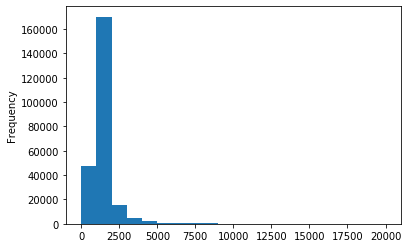

In [10]:
caged_sudeste['Salário Mensal'].plot.hist(bins=20,range=(0.1, 20000))

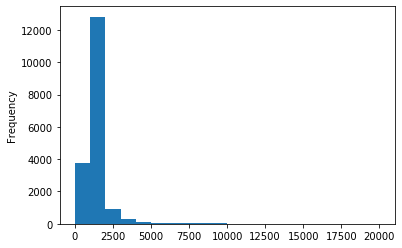

In [11]:
caged_nordeste['Salário Mensal'].plot.hist(bins=20,range=(0.1, 20000))

## Intervalo de confiança antes da normalização sudeste

In [12]:
scipy.stats.norm.interval(alpha=0.95,loc=caged_sudeste['Salário Mensal'].mean(),scale=caged_sudeste['Salário Mensal'].std())

(-1571.4098642474798, 4487.442913401931)

## Intervalo de confiança depois da normalização sudeste

In [13]:
# aplicando o LOG na série de dados de salário e plotando uam distribuição
caged_sudeste['Salário Mensal'] = np.log(caged_sudeste['Salário Mensal'])

In [14]:
# subtrair a média e dividir pelo desvio-padrão)
caged_sudeste['Salário Mensal'] = ( caged_sudeste['Salário Mensal'] - caged_sudeste['Salário Mensal'].mean() ) / caged_sudeste['Salário Mensal'].std()


In [15]:
# calculando o intervalo de confiança para os dados normalizados
# é esperado os valores de z_score
scipy.stats.norm.interval(alpha=0.95,loc=caged_sudeste['Salário Mensal'].mean(),scale=caged_sudeste['Salário Mensal'].std())

(-1.959963984539502, 1.959963984540956)

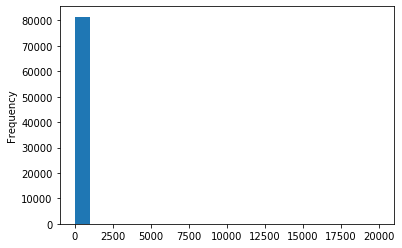

In [16]:
caged_sudeste['Salário Mensal'].plot.hist(bins=20,range=(0.1, 20000))

## Intervalo de confiança antes da normalização nordeste

In [17]:
scipy.stats.norm.interval(alpha=0.95,loc=caged_nordeste['Salário Mensal'].mean(),scale=caged_nordeste['Salário Mensal'].std())

(-1011.3982633938358, 3841.676829323672)

## Intervalo de confiança depois da normalização nordeste

In [18]:
# aplicando o LOG na série de dados de salário e plotando uam distribuição
caged_nordeste['Salário Mensal'] = np.log(caged_nordeste['Salário Mensal'])

In [19]:
# subtrair a média e dividir pelo desvio-padrão)
caged_nordeste['Salário Mensal'] = ( caged_nordeste['Salário Mensal'] - caged_nordeste['Salário Mensal'].mean() ) / caged_nordeste['Salário Mensal'].std()


In [20]:
# calculando o intervalo de confiança para os dados normalizados
# é esperado os valores de z_score
scipy.stats.norm.interval(alpha=0.95,loc=caged_nordeste['Salário Mensal'].mean(),scale=caged_nordeste['Salário Mensal'].std())

(-1.959963984539992, 1.959963984540232)

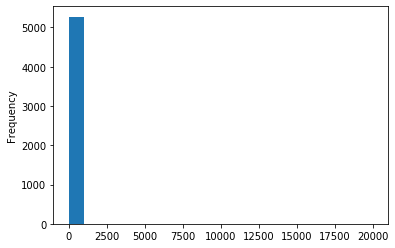

In [21]:
caged_nordeste['Salário Mensal'].plot.hist(bins=20,range=(0.1, 20000))